In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['digit-recognizer']


In [4]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv( '../input/digit-recognizer/test.csv' )

#Reading data using Pandas
X_train=  (train_df.iloc[:,1:].values).astype('float32')
print(X_train.shape)
Y_train = (train_df.iloc[:,0].values).astype('int32')
X_test=  (test_df.iloc[:,:].values).astype('float32')
print(X_test.shape)
#Y_test = (test_df.iloc[:,0].values).astype('int32')

(42000, 784)
(28000, 784)


In [5]:
from keras.utils.np_utils import to_categorical
X_train = X_train/255
X_test = X_test/255
Y_train = to_categorical(Y_train)

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation
model = Sequential()
# Note here that input_shape does not take number of training samples as input
# Adding Activation as a separate layer is same as specifing the activation parameter in Dense layer

model.add(Dense(5, activation = 'relu', input_shape= X_train.shape[1:]))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, verbose=1)

Epoch 1/10
42000/42000 [==============================] - 3s 74us/step - loss: 1.3747 - acc: 0.5060
Epoch 2/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.8885 - acc: 0.6985
Epoch 3/10
42000/42000 [==============================] - 3s 71us/step - loss: 0.7744 - acc: 0.7582
Epoch 4/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.7142 - acc: 0.7866
Epoch 5/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.6611 - acc: 0.8123
Epoch 6/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.6196 - acc: 0.8272
Epoch 7/10
42000/42000 [==============================] - 3s 65us/step - loss: 0.5948 - acc: 0.8347
Epoch 8/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.5780 - acc: 0.8401
Epoch 9/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.5660 - acc: 0.8434
Epoch 10/10
42000/42000 [==============================] - 3s 65us/step - loss: 0.5548 - acc: 0.8480

dict_keys(['loss', 'acc'])


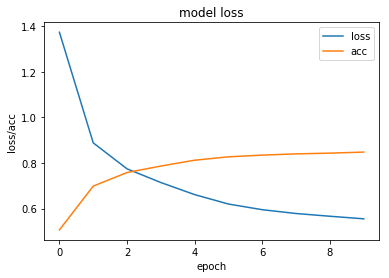

In [8]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss/acc')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'])
plt.show()

In [9]:
predictions = model.predict(X_test)
predicted_vals = np.argmax(predictions, axis = 1)

Predicted vals: 7


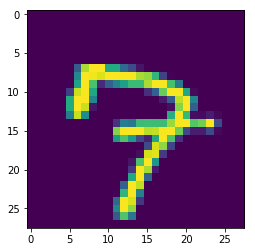

In [10]:
img = X_test[5]
img = np.reshape(img, (28, 28) )
plt.imshow(img)
print("Predicted vals: " + str(predicted_vals[5]))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

seed = 7
np.random.seed(seed)

# note that  tensorflow backend accepts input in form of (rows, columns, channels) wheres theano accepts it as (chnanel, rows, columns)
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=( 28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = create_model()
X_train =  np.reshape(X_train, ( X_train.shape[0], 28,  28, 1) )
# Fit the model
history = model.fit(X_train, Y_train, epochs=10, validation_split= 0.3, batch_size=200, verbose=1)
X_test =  np.reshape(X_test, ( X_test.shape[0], 28,  28, 1) )
print(X_test.shape)

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 12s 393us/step - loss: 0.3393 - acc: 0.9036 - val_loss: 0.1266 - val_acc: 0.9652
Epoch 2/10
29399/29399 [==============================] - 11s 377us/step - loss: 0.1050 - acc: 0.9692 - val_loss: 0.0794 - val_acc: 0.9774
Epoch 3/10
29399/29399 [==============================] - 11s 373us/step - loss: 0.0706 - acc: 0.9792 - val_loss: 0.0660 - val_acc: 0.9798
Epoch 4/10
29399/29399 [==============================] - 11s 376us/step - loss: 0.0532 - acc: 0.9834 - val_loss: 0.0597 - val_acc: 0.9810
Epoch 5/10
29399/29399 [==============================] - 11s 372us/step - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0515 - val_acc: 0.9843
Epoch 6/10
29399/29399 [==============================] - 11s 384us/step - loss: 0.0355 - acc: 0.9893 - val_loss: 0.0511 - val_acc: 0.9844
Epoch 7/10
29399/29399 [==============================] - 11s 374us/step - loss: 0.0300 - acc: 0.9909 - val_loss: 0.

In [13]:
predictions = model.predict(X_test)
predicted_vals = np.argmax(predictions, axis = 1)
predicted_vals = predicted_vals

In [14]:
results = pd.Series(predicted_vals,name="Label")
submission = pd.concat([pd.Series(range(1,len(predicted_vals) + 1 ),name = "ImageId"),results],axis =1 )
submission.to_csv("cnn_mnist_predict_new.csv",index=False)